<a href="https://colab.research.google.com/github/Tekleab15/Quantum_Computing_Tasks/blob/main/Task2_Entanglement_Witness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Entanglement Witness**

Build a circuit to test if two qubits are entangled:

Prepare a Bell state (|00⟩ + |11⟩)/√2.

Add a probabilistic error: With 20% chance, apply an X gate to one qubit.

Measure just one qubit 1000 times. Is the output random (50/50)? If not, the qubits are no longer entangled.

Goal: Show that entanglement breaks if you modify one qubit.

**What is Entanglement witness? :**  An entanglement witness is a way to test for entanglement in a quantum system without needing to perform full quantum state tomography.

here is the demonstration How it works ?

An entanglement witness
**𝑊**
 is constructed so that for every separable (unentangled) state **𝜌**sep
, the expectation value is non-negative:

# Tr(**𝑊**𝜌sep) ≥ 0.
However, for at least one entangled state
𝜌ent
, the expectation value is negative:

#  Tr(**𝑊**𝜌ent) < 0.

My Approach to this task
Prepare the Bell State: We begin by creating the Bell state

## **∣Φ+⟩=∣00⟩+∣11⟩2**
,
which guarantees that if we measure one qubit, the outcome is statistically random (50/50).

Quantum entanglement is a unique phenomenon in quantum mechanics where two or more particles become linked together in such a way that they share the same fate, no matter how far apart they are.
Bell states are a set of maximally entangled two-qubit states. In a perfect Bell state  (∣00⟩+∣11⟩)/sqrt(2), measuring one qubit will instantly determine the state of the other.

In [ ]:
#Installing the required modules and libraries
!pip install qiskit qiskit-aer

In [ ]:
# Importing the required modules and libraries
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import random

In [16]:
# Function to prepare the Bell state
def entanglement_witness(shots=1000):
    qc = QuantumCircuit(2, 1)  # 2 qubits, 1 classical bit

    # 1. Prepare Bell state (|00⟩ + |11⟩)/√2
    qc.h(0)
    qc.cx(0, 1)

    # 2. Introduce error that breaks entanglement (20% chance)
    if random.random() < 0.2:
        # Apply X gate to qubit 0 (as per the task description)
        qc.x(0)

    # 3. Measure qubit 0
    qc.measure(0, 0)

    # Use the Sampler (note: using Sampler instead of SamplerV2 for compatibility)
    sampler = Sampler()
    job = sampler.run(qc, shots=shots)
    result = job.result()

    # Get the measurement counts
    counts = result.quasi_dists[0].binary_probabilities()

    # Convert to simple counts format
    measurement_counts = {'0': int(shots * counts.get('0', 0)),
                         '1': int(shots * counts.get('1', 0))}

    return measurement_counts

**Visualizing and Measuring Entanglement**

<ipython-input-15-35065f51b55a>:2: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  measurement_counts = entanglement_witness(shots=1000)


Measurement Counts: {'0': 501, '1': 499}
Probability of |0⟩: 0.5010
Probability of |1⟩: 0.4990


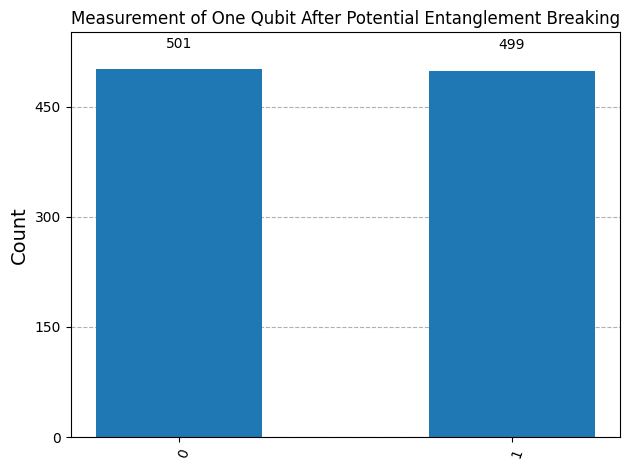

In [15]:
# Run the experiment
measurement_counts = entanglement_witness(shots=1000)
print("Measurement Counts:", measurement_counts)

# Calculate probabilities
total = sum(measurement_counts.values())
prob_0 = measurement_counts['0'] / total
prob_1 = measurement_counts['1'] / total

print(f"Probability of |0⟩: {prob_0:.4f}")
print(f"Probability of |1⟩: {prob_1:.4f}")

# Visualize the results
plot_histogram(measurement_counts, title="Measurement of One Qubit After Potential Entanglement Breaking")